# PCA

## Наводящие размышления

Если размерность исходных данных велика, то можно отбросить некоторые признаки и не включать их в рассмотрение.

Тогда встает вопрос: "Как же определить, что мы не отказались от чего-то важного?"

Как вариант, можно синтезировать новые признаки, размерность которых будет не так велика. В таком случае мы потеряем какое-то количество информации, но сделаем новые признаки максимально информативными.

Цель PCA - уменьшение размерности входных данных с минимальными потерями в информативности за счет подбора новой системы координат. Мы не отбрасываем данные, а делаем некоторую композицию, имеющую меньшую размерность.

## Идея метода на частном примере

x_1, x_2, ..., x_n - набор объектов

x_i = (x_i1, x_i2), i = {1, 2, ..., n}


In [10]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(0, 6, step=0.2)
Y = np.random.uniform(-1, 4, X.shape[0])


In [11]:
def plot(X, Y, plot_type: str, **kwargs):
    plt.axvline(0, color="black")
    plt.axhline(0, color="black")
    plt.xlim(-6, 6)
    plt.ylim(-6, 6)
    plt.grid()
    plt.__getattribute__(plot_type)(X, Y, **kwargs)

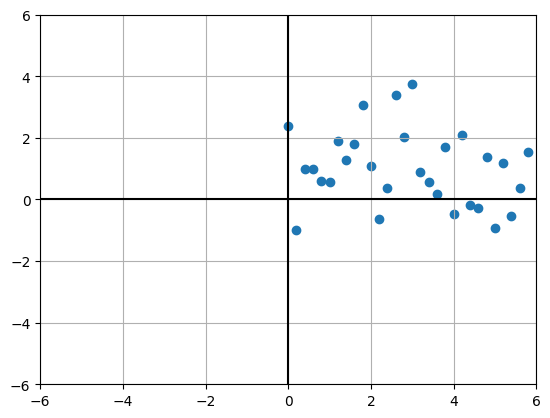

In [12]:
plot(X, Y, plot_type="scatter")

Выполним центрирование - из каждой точки вычтем среднее значение всей выборки

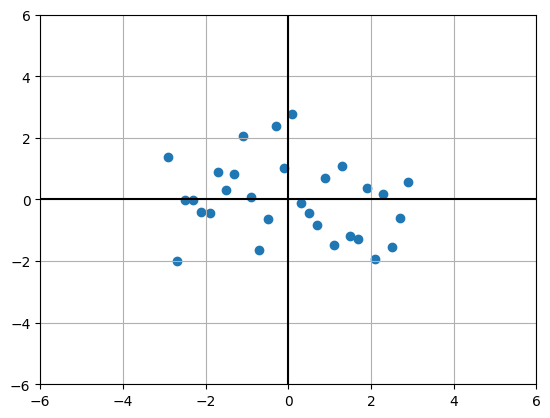

In [13]:
X_centered = X - np.mean(X)
Y_centered = Y - np.mean(Y)

plot(X_centered, Y_centered, plot_type="scatter")

После уменьшения размерности каждому объекту x_i = (x_i1, x_i2) будет соответствовать единственное число z_i

$$ Z = (z_1, z_2, ..., z_n) $$

где Z - новые координатая всех объектов

По сути, объекты станут точками на некоторой прямой

In [14]:
# прямая, на которую будут проецироваться объекты

X_line = np.array([-6, 6])
Y_line = np.array([-6, 6])

In [15]:
# проецирование объектов на прямую

from functions import projection

projections = [
    projection((1, 1), (X_centered[i], Y_centered[i]))
    for i in range(len(X_centered))
]

X_proj = [p[0] for p in projections]
Y_proj = [p[1] for p in projections]

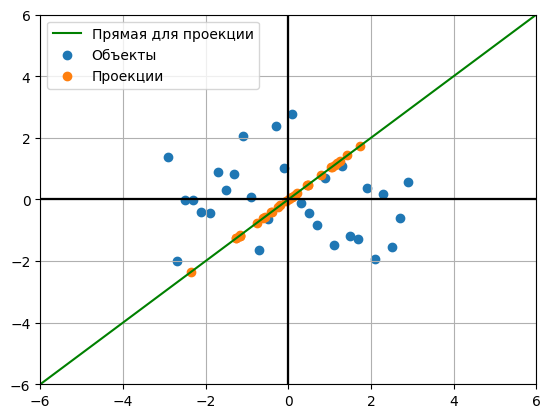

In [16]:
plot(X_line, Y_line, plot_type="plot", c='green', label='Прямая для проекции')
plot(X_centered, Y_centered, plot_type="scatter", label='Объекты')
plot(X_proj, Y_proj, plot_type="scatter", label='Проекции')

plt.legend()
plt.show()

Очевидно, что при уменьшении размерности теряется какая-то информация. Для минимизации потерь новые координаты должны как можно сильнее различаться между собой.

В качестве меры различия используется **выборочная дисперсия**:

$$ S^2(Z_1) = {1 \over n} \sum_{i=1}^n (z_i - \overline{Z_1}) $$

$$ \overline{Z_1} = {1 \over n} \sum_{i=1}^n Z_i $$

**Первая главная компонента** - прямая, проходящая через начало координат, координаты проекций центрированных исходных объектов на которую боладают наибольшей выборочной дисперсией

Направляющий вектор $ \phi $ ГК, имеющий длину 1, называется **вектором весов первой ГК**.

Если пространство двумерное, то $\phi$ имеет координаты ${\phi}_1$ и ${\phi}_2$

Задача уменьшения размерности сводится к поиску такого способа проведения прямой, чтобы координаты проекций точек на эту прямую различались наиболее сильно, то есть обладали наибольшей выборочной дисперсией

Первая ГК:
- Проходит через начало координат
- Координаты проекций максимально различаются между собой

Вторая и последующие ГК:
- Проходят через начало координат
- Ортогональны всем ранее построенным ГК
- Обеспечивают максимизацию выборочной дисперсии

## Общее описание метода ГК

Матрица исходных данных $F$:


\begin{equation}
  \begin{bmatrix}
    x_{11} & x_{12} & ... & x_{1p} \\ 
    x_{21} & x_{22} & ... & x_{2p} \\ 
    ... & ... & ... & ... \\ 
    x_{n1} & x_{n2} & ... & x_{np} \\ 
  \end{bmatrix}
\end{equation}

где каждая строка - это объект.

Будем считать, что эта матрица является результатом центрирования: из каждого элемента строки вычли среднее по столбцу.

Это позволит считать, что выборочное среднее для всех признаков будет равно нулю.

**Вектор счётов первой ГК** - это вектор-столбец $Z_1$ вида

\begin{equation}
  \begin{bmatrix}
    z_{11}\\ 
    z_{21}\\ 
    ...\\ 
    z_{n1}\\ 
  \end{bmatrix}
\end{equation}

состоящий из координат проекций центрированных исходных данных на вектор весов первой ГК (новые координаты объектов относительно первой ГК)

Вектор счётов может быть найден по следующей формуле:

$ Z_1 = F * \phi_1 $

Как найти вектор весов первой ГК?

\begin{equation}
  \begin{bmatrix}
    z_{11}\\ 
    z_{21}\\ 
    ...\\ 
    z_{n1}\\ 
  \end{bmatrix}
  =
  \begin{bmatrix}
    x_{11} & x_{12} & ... & x_{1p} \\ 
    x_{21} & x_{22} & ... & x_{2p} \\ 
    ... & ... & ... & ... \\ 
    x_{n1} & x_{n2} & ... & x_{np} \\ 
  \end{bmatrix}
  *
    \begin{bmatrix}
    \phi_{11}\\ 
    \phi_{21}\\ 
    ...\\ 
    \phi_{n1}\\ 
  \end{bmatrix}
\end{equation}

При этом $S^2(Z_1) = \overline{Z^2_1} - \overline{Z_1}^2$ - выборочная дисперсия $Z_1$ должна быть максимальна

где $\overline{Z^2_1}$ - выборочное среднее квадратов значений $Z_1$, а $\overline{Z_1}^2$ - квадрат выборочного среднего


Вспомним, что выборочное среднее равно нулю, так как величина центрированная. Следовательно, квадрат выборочного среднего равен нулю. Отсюда

$$ S^2(Z_1) = \overline{Z^2_1} = {1 \over n} \sum_{i=1}^n (z_{i1})^2 $$

при этом

$$z_{i1} = \sum_{j=1}^p (\phi_{j1} * x_{1j})$$

решить необходимо следующую задачу:

$$ \underset{\phi_1}{\mathrm{argmax}} ({1 \over n} * \sum_{i=1}^n z_{i1}^2)  = \underset{\phi_1}{\mathrm{argmax}} ({1 \over n} * \sum_{i=1}^n (\sum_{j=1}^p \phi_{j1} * x_{ij})^2) $$

при условии, что $|\phi_1| = 1$

для вычисления вектора счетов k-ой ГК используется формула в общем виде:

$$ \underset{\phi_k}{\mathrm{argmax}} ({1 \over n} * \sum_{i=1}^n z_{ik}^2)  = \underset{\phi_1}{\mathrm{argmax}} ({1 \over n} * \sum_{i=1}^n (\sum_{j=1}^p \phi_{jk} * x_{ij})^2) $$

но при этом $ \phi_k  ортогонален  \forall \phi_i \in [1, 2, ..., k-1]$